# Can we identify faulty or suboptimally performing equipment?

Time series forcasting framed as a surpervised learning problem - the sliding window method: https://machinelearningmastery.com/time-series-forecasting-supervised-learning/#:~:text=Sliding%20window%20is%20the%20way,using%20the%20sliding%20window%20method.

To solve, we can only identify suboptimal or faulty inverters. For plant 1 this means out of the 22 inverters. 
To classify inverter as a suboptimal, we would first need to know what is subotpimal. This should be basicly viewed from historical data. So plot the data and present suboptimal assumptions. 
So our model should first learn what is suboptimal (and if there even is suboptimal panel in learning period) and only then can we predict which of the panels is suboptimal. 

We need multivariate time series (as multiple variables) and probably multi-step forcasting as single step is not enough (and data can be missing). How many steps should be tested. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
gd = pd.read_csv("Plant_1_Generation_Data.csv")
wd = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

In [4]:
gd

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [5]:
wd

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [31]:
gd[600:602]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC_power_mean_dif
600,15-05-2020 07:00,4135001,McdE0feGgRqW7Ca,1920.250000,188.250000,80.250000,7159044.250,-119.552752
601,15-05-2020 07:00,4135001,VHMLBKoKgIrUVDU,1942.142857,190.371429,75.142857,7206483.143,-117.431324


In [19]:
gd['DC_POWER'].mean()

3147.4262112269266

In [20]:
gd.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [21]:
gd['AC_POWER'].mean()

307.8027522655165

In [24]:
gd['AC_power_mean_dif']=gd['AC_POWER']-gd['AC_POWER'].mean()
gd['AC_power_mean_dif']

0       -307.802752
1       -307.802752
2       -307.802752
3       -307.802752
4       -307.802752
            ...    
68773   -307.802752
68774   -307.802752
68775   -307.802752
68776   -307.802752
68777   -307.802752
Name: AC_power_mean_dif, Length: 68778, dtype: float64

In [32]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE_TIME          68778 non-null  object 
 1   PLANT_ID           68778 non-null  int64  
 2   SOURCE_KEY         68778 non-null  object 
 3   DC_POWER           68778 non-null  float64
 4   AC_POWER           68778 non-null  float64
 5   DAILY_YIELD        68778 non-null  float64
 6   TOTAL_YIELD        68778 non-null  float64
 7   AC_power_mean_dif  68778 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.2+ MB


In [37]:
gd['DATE_TIME'] = pd.to_datetime(gd['DATE_TIME'], errors='coerce')

In [42]:
gd['date']=pd.to_datetime(gd['DATE_TIME'].dt.date)
gd['time']=gd['DATE_TIME'].dt.time
gd.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC_power_mean_dif,date,time
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,-307.802752,2020-05-15,00:00:00
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,-307.802752,2020-05-15,00:00:00
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,-307.802752,2020-05-15,00:00:00
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,-307.802752,2020-05-15,00:00:00
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,-307.802752,2020-05-15,00:00:00


In [93]:
gd['DATE_TIME'].unique()

array(['2020-05-15T00:00:00.000000000', '2020-05-15T00:15:00.000000000',
       '2020-05-15T00:30:00.000000000', ...,
       '2020-06-17T23:15:00.000000000', '2020-06-17T23:30:00.000000000',
       '2020-06-17T23:45:00.000000000'], dtype='datetime64[ns]')

In [47]:
gd['SOURCE_KEY'].unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [48]:
gd.shape

(68778, 10)

In [6]:
grouped = gd.groupby("SOURCE_KEY")

In [7]:
grouped.mean()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
SOURCE_KEY,,,,,
1BY6WEcLGh8j5v7,4135001,2873.720981,281.124073,3230.658151,6.377464e+06
1IF53ai7Xc0U56Y,4135001,3226.336768,315.488026,3356.882104,6.313086e+06
3PZuoBAID5Wc2HD,4135001,3221.015673,314.967354,3356.856357,7.117013e+06
7JYdWkrLSPkdwr4,4135001,3132.891955,306.385671,3325.810327,7.728914e+06
McdE0feGgRqW7Ca,4135001,3211.307245,314.046321,3321.935705,7.287580e+06
VHMLBKoKgIrUVDU,4135001,3210.102563,313.900096,3407.255472,7.335465e+06
WRmjgnKYAwPKWDb,4135001,3155.384433,308.575465,3290.830582,7.155458e+06
YxYtjZvoooNbGkE,4135001,3179.492570,310.930334,3300.900825,7.307357e+06
ZnxXDlPa8U1GXgE,4135001,3194.059104,312.346427,3378.012862,6.650663e+06


In [8]:
grouped.indices

{'1BY6WEcLGh8j5v7': array([    0,    21,    42, ..., 68712, 68734, 68756], dtype=int64),
 '1IF53ai7Xc0U56Y': array([    1,    22,    43, ..., 68713, 68735, 68757], dtype=int64),
 '3PZuoBAID5Wc2HD': array([    2,    23,    44, ..., 68714, 68736, 68758], dtype=int64),
 '7JYdWkrLSPkdwr4': array([    3,    24,    45, ..., 68715, 68737, 68759], dtype=int64),
 'McdE0feGgRqW7Ca': array([    4,    25,    46, ..., 68716, 68738, 68760], dtype=int64),
 'VHMLBKoKgIrUVDU': array([    5,    26,    47, ..., 68717, 68739, 68761], dtype=int64),
 'WRmjgnKYAwPKWDb': array([    6,    27,    48, ..., 68718, 68740, 68762], dtype=int64),
 'YxYtjZvoooNbGkE': array([   91,   155,   366, ..., 68719, 68741, 68763], dtype=int64),
 'ZnxXDlPa8U1GXgE': array([    7,    28,    49, ..., 68720, 68742, 68764], dtype=int64),
 'ZoEaEvLYb1n2sOq': array([    8,    29,    50, ..., 68721, 68743, 68765], dtype=int64),
 'adLQvlD726eNBSB': array([    9,    30,    51, ..., 68722, 68744, 68766], dtype=int64),
 'bvBOhCH3iADSZry': a

In [9]:
groups = dict(list(grouped))
groups['1BY6WEcLGh8j5v7']

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
21,15-05-2020 00:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
42,15-05-2020 00:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
63,15-05-2020 00:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
84,15-05-2020 01:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
...,...,...,...,...,...,...,...
68668,17-06-2020 22:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68690,17-06-2020 23:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68712,17-06-2020 23:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68734,17-06-2020 23:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0


In [10]:
groups['1BY6WEcLGh8j5v7']['DATE_TIME']

0        15-05-2020 00:00
21       15-05-2020 00:15
42       15-05-2020 00:30
63       15-05-2020 00:45
84       15-05-2020 01:00
               ...       
68668    17-06-2020 22:45
68690    17-06-2020 23:00
68712    17-06-2020 23:15
68734    17-06-2020 23:30
68756    17-06-2020 23:45
Name: DATE_TIME, Length: 3154, dtype: object

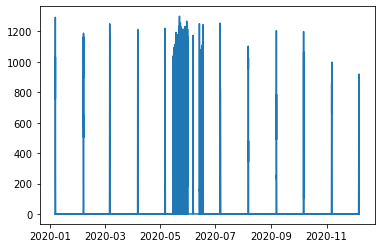

In [102]:
plt.plot(groups['1BY6WEcLGh8j5v7']['DATE_TIME'],groups['1BY6WEcLGh8j5v7']['AC_POWER'])

In [11]:
grouped.size()

SOURCE_KEY
1BY6WEcLGh8j5v7    3154
1IF53ai7Xc0U56Y    3119
3PZuoBAID5Wc2HD    3118
7JYdWkrLSPkdwr4    3133
McdE0feGgRqW7Ca    3124
VHMLBKoKgIrUVDU    3133
WRmjgnKYAwPKWDb    3118
YxYtjZvoooNbGkE    3104
ZnxXDlPa8U1GXgE    3130
ZoEaEvLYb1n2sOq    3123
adLQvlD726eNBSB    3119
bvBOhCH3iADSZry    3155
iCRJl6heRkivqQ3    3125
ih0vzX44oOqAx2f    3130
pkci93gMrogZuBj    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
uHbuxQJl8lW7ozc    3125
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
zBIq5rxdHJRwDNY    3119
zVJPv84UY57bAof    3124
dtype: int64

In [8]:
groups = dict(list(gd.groupby("SOURCE_KEY")))
groups

{'1BY6WEcLGh8j5v7':               DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
 0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 21     15-05-2020 00:15   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 42     15-05-2020 00:30   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 63     15-05-2020 00:45   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 84     15-05-2020 01:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 ...                 ...       ...              ...       ...       ...   
 68668  17-06-2020 22:45   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 68690  17-06-2020 23:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 68712  17-06-2020 23:15   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 68734  17-06-2020 23:30   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 68756  17-06-2020 23:45   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 
        DAILY_YIELD  TOTAL_YIELD  
 0              0.0    6259559.0  
 21      

# Shifting to create multisteps

In [9]:
#Focusing on a specific inverter

st=groups['1BY6WEcLGh8j5v7']
st

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
21,15-05-2020 00:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
42,15-05-2020 00:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
63,15-05-2020 00:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
84,15-05-2020 01:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
...,...,...,...,...,...,...,...
68668,17-06-2020 22:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68690,17-06-2020 23:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68712,17-06-2020 23:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68734,17-06-2020 23:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0


In [139]:
#Adding 3 shifter DC POWER values and label column "FAULTY"

st['DC_POWER_shift_1']=st['DC_POWER'].shift(-1)
st['DC_POWER_shift_2']=st['DC_POWER'].shift(-2)
st['DC_POWER_shift_3']=st['DC_POWER'].shift(-3)
st['FAULTY']=np.random.randint(0, 2, st.shape[0])

#ignore NaN
st=st.fillna(value=0)
    
st

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DC_POWER_shift_1,DC_POWER_shift_2,DC_POWER_shift_3,FAULTY
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,0.0,0.0,0
21,15-05-2020 00:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,0.0,0.0,1
42,15-05-2020 00:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,0.0,0.0,1
63,15-05-2020 00:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,0.0,0.0,1
84,15-05-2020 01:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
68668,17-06-2020 22:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0,0.0,0.0,0
68690,17-06-2020 23:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0,0.0,0.0,1
68712,17-06-2020 23:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0,0.0,0.0,1
68734,17-06-2020 23:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,0.0,0.0,0.0,0


In [140]:
#Train/test split
jaotaja = int(st['SOURCE_KEY'].size*0.8)

train_X = st.iloc[0: jaotaja,3:(st.columns.size-1)]
label_X = st.iloc[0: jaotaja,(st.columns.size-1)]

val_y = st.iloc[jaotaja:,3:(st.columns.size-1)]
label_y = st.iloc[jaotaja:,(st.columns.size-1)]


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier() 
model2 = KNeighborsClassifier()
model3 = LogisticRegression()
model4 = BaggingClassifier()
model5 = svm.SVC()
model6 = GaussianNB()
model7 = linear_model.Ridge()
model8 = AdaBoostClassifier(n_estimators=100)
model9 = RandomForestClassifier(max_depth=2, random_state=0)

model1.fit(train_X,label_X)
model2.fit(train_X,label_X)
model3.fit(train_X,label_X)
model4.fit(train_X,label_X)
model5.fit(train_X,label_X)
model6.fit(train_X,label_X)
model7.fit(train_X,label_X)
model8.fit(train_X,label_X)
model9.fit(train_X,label_X)

print(f"Accuracy of DT {model1.score(val_y, label_y)*100}%")
print(f"Accuracy of NN {model2.score(val_y, label_y)*100}%")
print(f"Accuracy of LR {model3.score(val_y, label_y)*100}%")
print(f"Accuracy of BC {model4.score(val_y, label_y)*100}%")
print(f"Accuracy of SVM {model5.score(val_y, label_y)*100}%")
print(f"Accuracy of GNB {model6.score(val_y, label_y)*100}%")
print(f"Accuracy of LMR {model7.score(val_y, label_y)*100}%")
print(f"Accuracy of AB {model8.score(val_y, label_y)*100}%")
print(f"Accuracy of RF {model9.score(val_y, label_y)*100}%")

Accuracy of DT 48.335974643423135%
Accuracy of NN 51.03011093502378%
Accuracy of LR 47.22662440570523%
Accuracy of BC 47.543581616481774%
Accuracy of SVM 48.335974643423135%
Accuracy of GNB 50.396196513470684%
Accuracy of LMR -0.3437180720771371%
Accuracy of AB 48.335974643423135%
Accuracy of RF 48.49445324881141%


Taskid:
    1. tulp "FAULTY" - alguses suvaliselt 0 ja 1'ga, hiljem juba andmete pealt mingi loogikaga
    2. Katsetada milliseid välju peaks shiftima ja kui palju (AC_POWER, DC_POWER, DAILY_YIELD, TOTAL_YIELD + ilma tulbad)
    3. kas ühe inverteri ennustamisel mängib olulist rolli ka teiste inverterite sama aja tootlus ja kuidas neid andmeid kokku liita? Kas üks tabel, kus lisa veerud iga teise inverteri jaoks või tensor?
    4. DONE - train/test split
    5. Models: 
    DONE , but incorrect alpha - linear regression
    DONE -logistic regression
    DONE - k-nearest neighbor
    neural networks
    DONE - support vector classifier
    DONE - random forest classifier 
    DONE - decision tree classifier - from sklearn.tree import DecisionTreeClassifier
    DONE - gaussian NaiveBayes
    DONE - Ada boost
    DONE - bagging classifier - from sklearn.ensemble import BaggingClassifier
    ensamble veel?
    6. puudu olevad andmed ja nende asendumisel lisatud 0?
    7. Kas ennustusest võiks jätta valjä kõik kus DC_POWER = 0, ehk öösel päikest pole või peaks seda tegema aja pealt kuidagi (ka päeval võib tootmine nulli minna)
    
    